In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
%run deep_convnet.ipynb
# from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")
sampled = 2000
x_test = x_test[:sampled]
t_test = t_test[:sampled]

In [3]:
def accuracy():
    classified_ids = []
    acc = 0.0
    batch_size = 100
    for i in range(int(x_test.shape[0] / batch_size)):
        tx = x_test[i * batch_size:(i + 1) * batch_size]
        tt = t_test[i * batch_size:(i + 1) * batch_size]
        y = network.predict(tx, train_flg=False)
        y = np.argmax(y, axis=1)
        classified_ids.append(y)
        acc += np.sum(y == tt)

    acc = acc / x_test.shape[0]
    print("test accuracy:" + str(acc))

    return classified_ids

In [4]:
def view_misclassified(classified_ids):
    classified_ids = np.array(classified_ids)
    classified_ids = classified_ids.flatten()

    max_view = 20
    current_view = 1

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

    mis_pairs = {}
    for i, val in enumerate(classified_ids == t_test):
        if not val:
            ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
            ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
            mis_pairs[current_view] = (t_test[i], classified_ids[i])

            current_view += 1
            if current_view > max_view :
                break

    print("======= misclassified result =======")
    print("{view index: (label, inference), ...}")
    print(mis_pairs)

    plt.show()

test accuracy:0.955
======= misclassified result =======
{view index: (label, inference), ...}
{1: (3, 5), 2: (6, 0), 3: (5, 9), 4: (6, 0), 5: (8, 0), 6: (8, 4), 7: (9, 8), 8: (2, 7), 9: (0, 1), 10: (8, 0), 11: (9, 7), 12: (8, 9), 13: (6, 0), 14: (4, 9), 15: (3, 5), 16: (0, 2), 17: (6, 0), 18: (9, 4), 19: (8, 9), 20: (8, 2)}


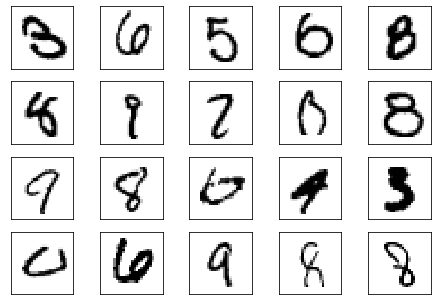

In [5]:
classified_ids = accuracy()
view_misclassified(classified_ids)